## SENTIMENT ANALYSIS

Finanacial Sentiment Analysis is requied to understand the general opinion of newsheadlines, which inturn could impact stock price, company decisions ..etc.

Dataset (FinancialPhraseBank) contains the sentiments for financial news headlines from the perspective of a retail investor. The dataset contains two columns, "Sentiment" and "News Headline". The sentiment can be negative, neutral or positive(3- Categories).

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno
# ! pip install missingno

url = "https://raw.githubusercontent.com/toshihiroryuu/Dataset-test/main/Finanacial_News_Sentiment.csv"

df = pd.read_csv(url, encoding='ISO-8859-1', names=["sentiment", "text"])

df.head(5)

sentiment                                               text
0   neutral  According to Gran , the company has no plans t...
1   neutral  Technopolis plans to develop in stages an area...
2  negative  The international electronic industry company ...
3  positive  With the new production plant the company woul...
4  positive  According to the company 's updated strategy f...

In [2]:
# identify the size of data frame
print("Size of the data frame is",df.size)

# identify the shape of the data frame 
print("Shape of the data frame is",df.shape)
print("No of Rows = ", df.shape[0])
print("No of Columns = ", df.shape[1])

df.describe()

Size of the data frame is 9692
Shape of the data frame is (4846, 2)
No of Rows =  4846
No of Columns =  2


sentiment                                               text
count       4846                                               4846
unique         3                                               4838
top      neutral  Ahlstrom 's share is quoted on the NASDAQ OMX ...
freq        2879                                                  2

### Handling Missing Data points

AxesSubplot(0.125,0.125;0.775x0.755)


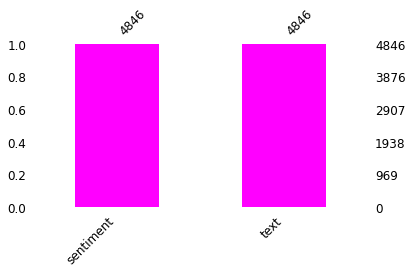

In [3]:
missing_bar  = msno.bar(df, figsize=(6, 3), fontsize=12, color='magenta')

print(missing_bar)

No missing values

#### Sentiment Analysis

In [6]:
# Balance of classes
class_dist = df['sentiment'].value_counts(normalize=True)
class_dist

neutral     0.594098
positive    0.281263
negative    0.124639
Name: sentiment, dtype: float64

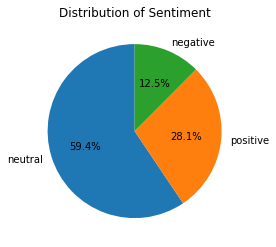

In [9]:
plt.pie(class_dist.values, labels = class_dist.index, 
        startangle=90, autopct='%1.1f%%', normalize=False)

plt.title('Distribution of Sentiment')
plt.show()

In [10]:
temp = []
#Splitting pd.Series to list
data_to_list = df['text'].values.tolist()

for i in range(len(data_to_list)):
    temp.append(data_to_list[i])

    list(temp[:5])

['According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .',
 'Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .',
 'The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported .',
 'With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .',
 "According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales ."]

In [ ]:
# ! pip install python-Levenshtein

In [15]:
# Basic Precprocessing to remove punctuation
import gensim

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
        

data_words = list(sent_to_words(temp))

print(data_words[:2])

[['according', 'to', 'gran', 'the', 'company', 'has', 'no', 'plans', 'to', 'move', 'all', 'production', 'to', 'russia', 'although', 'that', 'is', 'where', 'the', 'company', 'is', 'growing'], ['technopolis', 'plans', 'to', 'develop', 'in', 'stages', 'an', 'area', 'of', 'no', 'less', 'than', 'square', 'meters', 'in', 'order', 'to', 'host', 'companies', 'working', 'in', 'computer', 'technologies', 'and', 'the', 'statement', 'said']]


In [19]:
#combine tokens to genetate sentences
from nltk.tokenize.treebank import TreebankWordDetokenizer

def detokenize(text):
    return TreebankWordDetokenizer().detokenize(text)

In [21]:
data = []

for i in range(len(data_words)):
    data.append(detokenize(data_words[i]))
    
print(data[:2])

['according to gran the company has no plans to move all production to russia although that is where the company is growing', 'technopolis plans to develop in stages an area of no less than square meters in order to host companies working in computer technologies and the statement said']


In [24]:
data = np.array(data)

In [26]:
import tensorflow as tf

labels = np.array(df['sentiment'])
y = []
for i in range(len(labels)):
    if labels[i] == 'neutral':
        y.append(0)
    if labels[i] == 'negative':
        y.append(1)
    if labels[i] == 'positive':
        y.append(2)
        
y = np.array(y)
labels = tf.keras.utils.to_categorical(y, 3, dtype="float32")
labels

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [27]:
len(labels)

4846

In [29]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint

max_words = 5000
max_len = 200

#Toeknise and pad sequence.
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data)
sequences = tokenizer.texts_to_sequences(data)
info = pad_sequences(sequences, maxlen=max_len)
print(info)

[[   0    0    0 ...    9    8  678]
 [   0    0    0 ...    1  843   18]
 [   0    0    0 ...  796 4568  214]
 ...
 [   0    0    0 ...    2    6   14]
 [   0    0    0 ...   11    6   14]
 [   0    0    0 ...   31  870   17]]


In [30]:
print(labels)

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [37]:
from sklearn.model_selection import train_test_split

# Train test split
X_train, X_test, Y_train, Y_test = train_test_split(info, labels, test_size=0.2, random_state=42)

print (len(X_train),len(X_test),len(Y_train),len(Y_test))

3876 970 3876 970


In [38]:
#Defien model
model = Sequential()
model.add(layers.Embedding(max_words, 20))
model.add(layers.LSTM(15,dropout=0.5))
model.add(layers.Dense(3,activation='softmax'))


model.compile(optimizer='rmsprop',
               loss='categorical_crossentropy', metrics=['accuracy'])

# Checkpoints
checkpoint = ModelCheckpoint("best_model.hdf5", 
                              monitor='val_accuracy', 
                              verbose=1,save_best_only=True,
                              mode='auto', period=1,
                              save_weights_only=False)

history = model.fit(X_train, Y_train, 
                     epochs = 100,validation_data=(X_test, Y_test),
                     callbacks=[checkpoint])

Epoch 1/100
122/122 [==============================] - 21s 115ms/step - loss: 0.9935 - accuracy: 0.5518 - val_loss: 0.8664 - val_accuracy: 0.5897

Epoch 00001: val_accuracy improved from -inf to 0.58969, saving model to best_model.hdf5
Epoch 2/100
122/122 [==============================] - 14s 112ms/step - loss: 0.8357 - accuracy: 0.6267 - val_loss: 0.7812 - val_accuracy: 0.6515

Epoch 00002: val_accuracy improved from 0.58969 to 0.65155, saving model to best_model.hdf5
Epoch 3/100
122/122 [==============================] - 12s 101ms/step - loss: 0.7612 - accuracy: 0.6618 - val_loss: 0.7474 - val_accuracy: 0.6814

Epoch 00003: val_accuracy improved from 0.65155 to 0.68144, saving model to best_model.hdf5
Epoch 4/100
122/122 [==============================] - 12s 98ms/step - loss: 0.6746 - accuracy: 0.7035 - val_loss: 0.7528 - val_accuracy: 0.6845

Epoch 00004: val_accuracy improved from 0.68144 to 0.68454, saving model to best_model.hdf5
Epoch 5/100
122/122 [===========================

122/122 [==============================] - 11s 90ms/step - loss: 0.1671 - accuracy: 0.9426 - val_loss: 0.9197 - val_accuracy: 0.7639

Epoch 00039: val_accuracy did not improve from 0.77835
Epoch 40/100
122/122 [==============================] - 12s 101ms/step - loss: 0.1512 - accuracy: 0.9469 - val_loss: 0.8773 - val_accuracy: 0.7557

Epoch 00040: val_accuracy did not improve from 0.77835
Epoch 41/100
122/122 [==============================] - 12s 95ms/step - loss: 0.1334 - accuracy: 0.9475 - val_loss: 0.8936 - val_accuracy: 0.7598

Epoch 00041: val_accuracy did not improve from 0.77835
Epoch 42/100
122/122 [==============================] - 11s 90ms/step - loss: 0.1456 - accuracy: 0.9431 - val_loss: 0.9439 - val_accuracy: 0.7557

Epoch 00042: val_accuracy did not improve from 0.77835
Epoch 43/100
122/122 [==============================] - 11s 91ms/step - loss: 0.1324 - accuracy: 0.9482 - val_loss: 0.9312 - val_accuracy: 0.7608

Epoch 00043: val_accuracy did not improve from 0.77835
Ep


Epoch 00079: val_accuracy did not improve from 0.77835
Epoch 80/100
122/122 [==============================] - 12s 97ms/step - loss: 0.1046 - accuracy: 0.9639 - val_loss: 1.1388 - val_accuracy: 0.7557

Epoch 00080: val_accuracy did not improve from 0.77835
Epoch 81/100
122/122 [==============================] - 12s 95ms/step - loss: 0.0849 - accuracy: 0.9688 - val_loss: 1.0786 - val_accuracy: 0.7505

Epoch 00081: val_accuracy did not improve from 0.77835
Epoch 82/100
122/122 [==============================] - 11s 87ms/step - loss: 0.0824 - accuracy: 0.9726 - val_loss: 1.1560 - val_accuracy: 0.7546

Epoch 00082: val_accuracy did not improve from 0.77835
Epoch 83/100
122/122 [==============================] - 11s 89ms/step - loss: 0.0815 - accuracy: 0.9713 - val_loss: 1.1394 - val_accuracy: 0.7557

Epoch 00083: val_accuracy did not improve from 0.77835
Epoch 84/100
122/122 [==============================] - 11s 89ms/step - loss: 0.0701 - accuracy: 0.9771 - val_loss: 1.1499 - val_accurac

In [39]:
import keras

# load the saved model.
best_model = keras.models.load_model("best_model.hdf5")

In [40]:
test_loss, test_acc = best_model.evaluate(X_test, Y_test, verbose=2)
print('Model accuracy: ', test_acc)

31/31 - 4s - loss: 0.6475 - accuracy: 0.7784
Model accuracy:  0.7783505320549011


In [41]:
predictions = best_model.predict(X_test)
predictions

array([[0.6213697 , 0.01683828, 0.361792  ],
       [0.96756035, 0.00563397, 0.02680567],
       [0.08448973, 0.22675297, 0.6887573 ],
       ...,
       [0.40152818, 0.01442281, 0.58404905],
       [0.02217581, 0.01162109, 0.9662031 ],
       [0.9058474 , 0.00437256, 0.08978004]], dtype=float32)

In [42]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(Y_test.argmax(axis=1), 
                          np.around(predictions, decimals=0).argmax(axis=1))
matrix

array([[506,  14,  51],
       [ 31,  68,  11],
       [102,   9, 178]], dtype=int64)

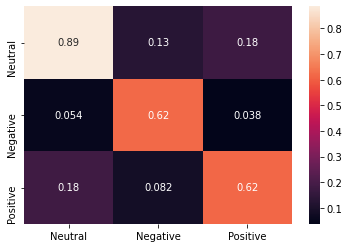

In [43]:
import seaborn as sns

conf_matrix = pd.DataFrame(matrix, index = ['Neutral','Negative','Positive'],
                           columns = ['Neutral','Negative','Positive'])
#Normalizing
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)
plt.figure()
sns.heatmap(conf_matrix, annot=True)
plt.show()

In [44]:
sentiment = ['Neutral','Negative','Positive']

In [46]:
sequence = tokenizer.texts_to_sequences(['With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability'])
test = pad_sequences(sequence, maxlen=max_len)

sentiment[np.around(best_model.predict(test), decimals=0).argmax(axis=1)[0]]

'Positive'

In [48]:
sequence = tokenizer.texts_to_sequences(['The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported .'])
test = pad_sequences(sequence, maxlen=max_len)

sentiment[np.around(best_model.predict(test), decimals=0).argmax(axis=1)[0]]

'Negative'

In [45]:
sequence = tokenizer.texts_to_sequences(['According to Gran , the company has no plans to move all production to Russia'])
test = pad_sequences(sequence, maxlen=max_len)

sentiment[np.around(best_model.predict(test), decimals=0).argmax(axis=1)[0]]

'Neutral'

## CLUSTERING

Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months.

Dataset URL : https://www.kaggle.com/arjunbhasin2013/ccdata

In [130]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno
# ! pip install missingno

url = "https://raw.githubusercontent.com/toshihiroryuu/Dataset-test/main/Creidit_Card.csv"

df = pd.read_csv(url)

df.head(5)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [104]:
# identify the size of data frame
print("Size of the data frame is",df.size)

# identify the shape of the data frame 
print("Shape of the data frame is",df.shape)
print("No of Rows = ", df.shape[0])
print("No of Columns = ", df.shape[1])

df.describe()

Size of the data frame is 161100
Shape of the data frame is (8950, 18)
No of Rows =  8950
No of Columns =  18


BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

### Handling Missing Data points

AxesSubplot(0.125,0.125;0.775x0.755)


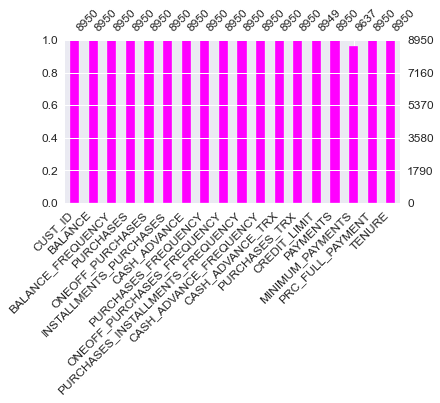

In [105]:
missing_bar  = msno.bar(df, figsize=(6, 3), fontsize=12, color='magenta')

print(missing_bar)

In [106]:
miss_count = df.isnull().sum().sum()

print("No of missing values is",miss_count)

No of missing values is 314


In [131]:
# Get rows where the data is missing
null_data = df[df.isnull().any(axis=1)]
null_data.head(5)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
3   C10004  1666.670542           0.636364     1499.0            1499.0   
45  C10047  2242.311686           1.000000      437.0              97.0   
47  C10049  3910.111237           1.000000        0.0               0.0   
54  C10056     6.660517           0.636364      310.0               0.0   
55  C10057  1311.995984           1.000000     1283.9            1283.9   

    INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
3                      0.0    205.788017             0.083333   
45                   340.0    184.648692             0.333333   
47                     0.0   1980.873201             0.000000   
54                   310.0      0.000000             0.666667   
55                     0.0      0.000000             0.250000   

    ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
3                     0.083333                          0.000000   
45                    0.083333                          0.333333   
47                    0.000000                          0.000000   
54                    0.000000                          0.666667   
55                    0.250000                          0.000000   

    CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
3                 0.083333                 1              1        7500.0   
45                0.166667                 2              5        2400.0   
47                0.500000                 7              0        4200.0   
54                0.000000                 0              8        1000.0   
55                0.000000                 0              6        6000.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
3     0.000000               NaN               0.0      12  
45    0.000000               NaN               0.0      12  
47    0.000000               NaN               0.0      12  
54  417.016763               NaN               0.0      12  
55    0.000000               NaN               0.0      12

In [132]:
df = df.dropna()
null_data = df[df.isnull().any(axis=1)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8636 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8636 non-null   object 
 1   BALANCE                           8636 non-null   float64
 2   BALANCE_FREQUENCY                 8636 non-null   float64
 3   PURCHASES                         8636 non-null   float64
 4   ONEOFF_PURCHASES                  8636 non-null   float64
 5   INSTALLMENTS_PURCHASES            8636 non-null   float64
 6   CASH_ADVANCE                      8636 non-null   float64
 7   PURCHASES_FREQUENCY               8636 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 11  CASH_ADVANCE_TRX                  8636 non-null   int64  
 12  PURCHA

### EDA

Shape of your Data Set: (8950, 18)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  14
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    18 Predictors classified...
        This does not include the Target column(s)
        1 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 105


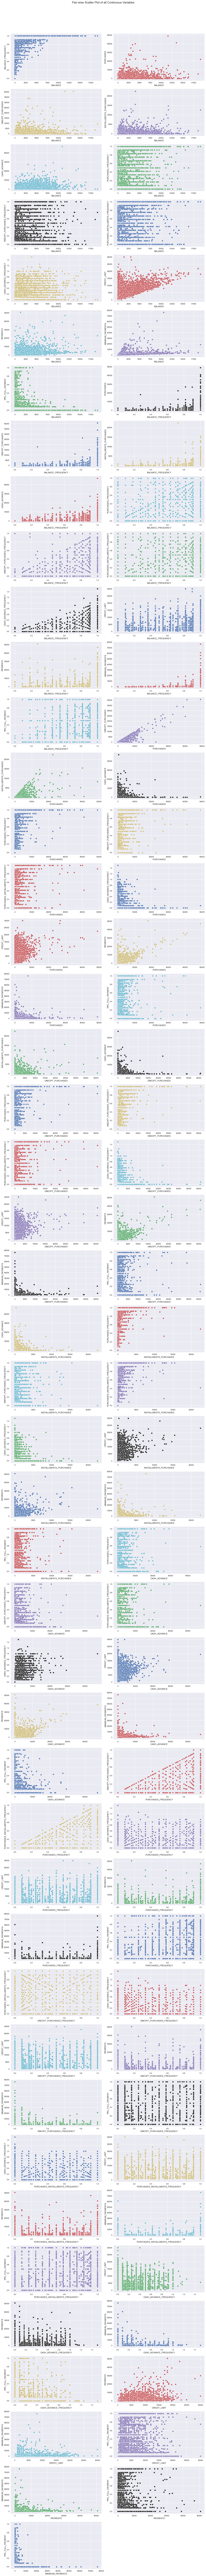

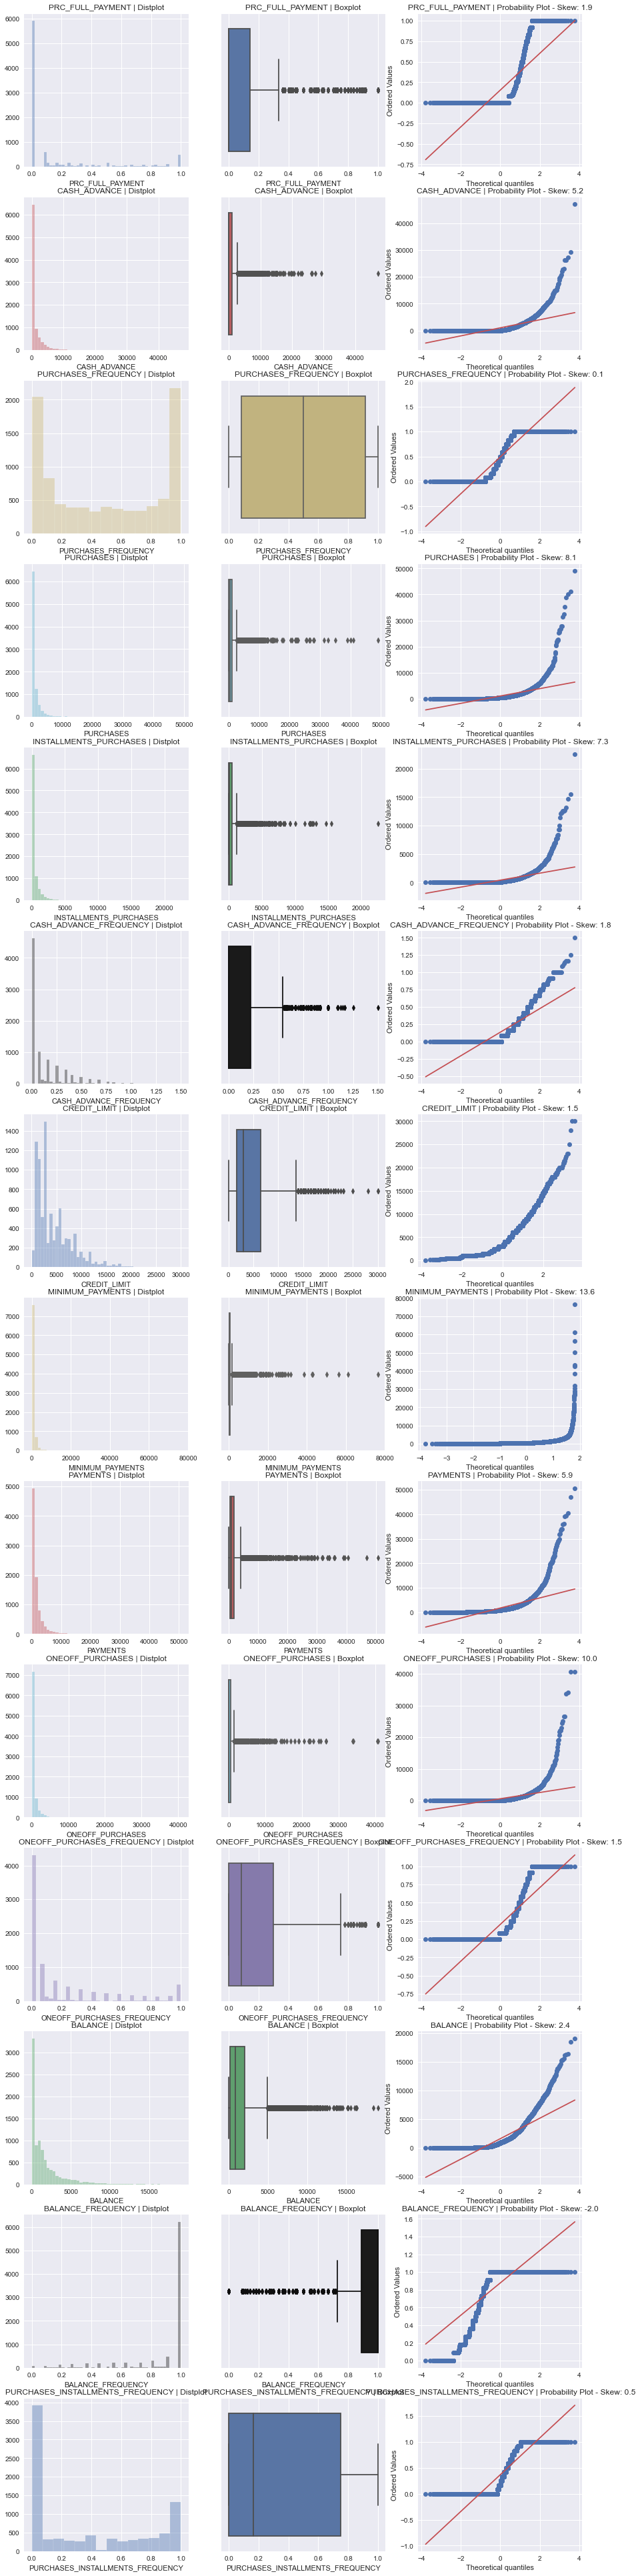

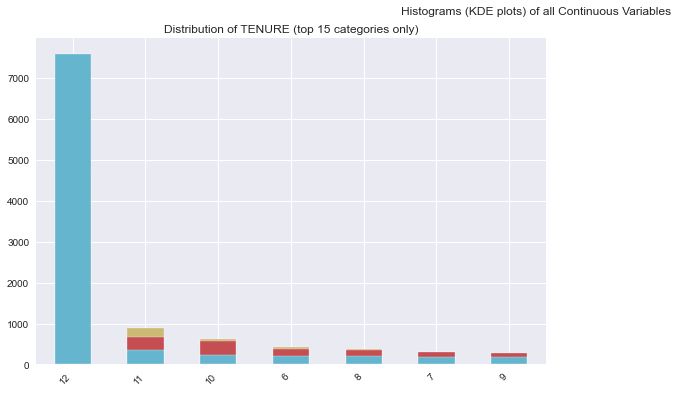

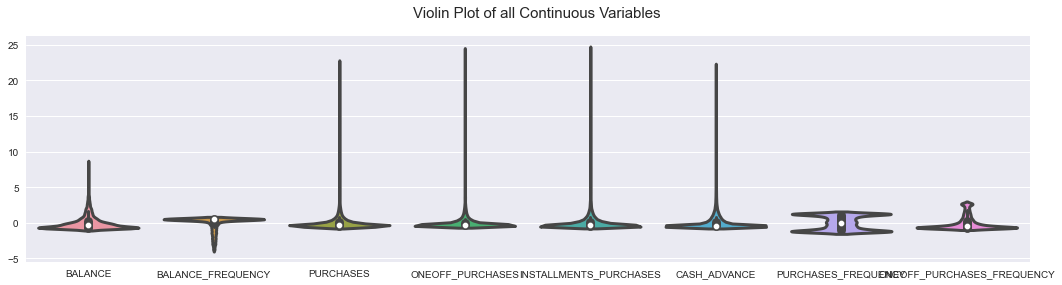

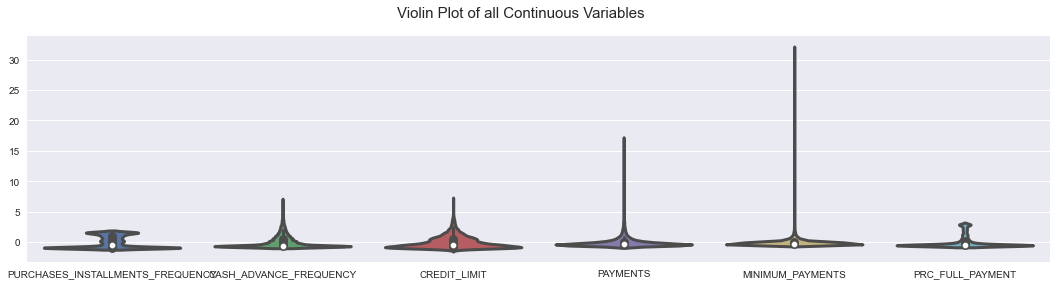

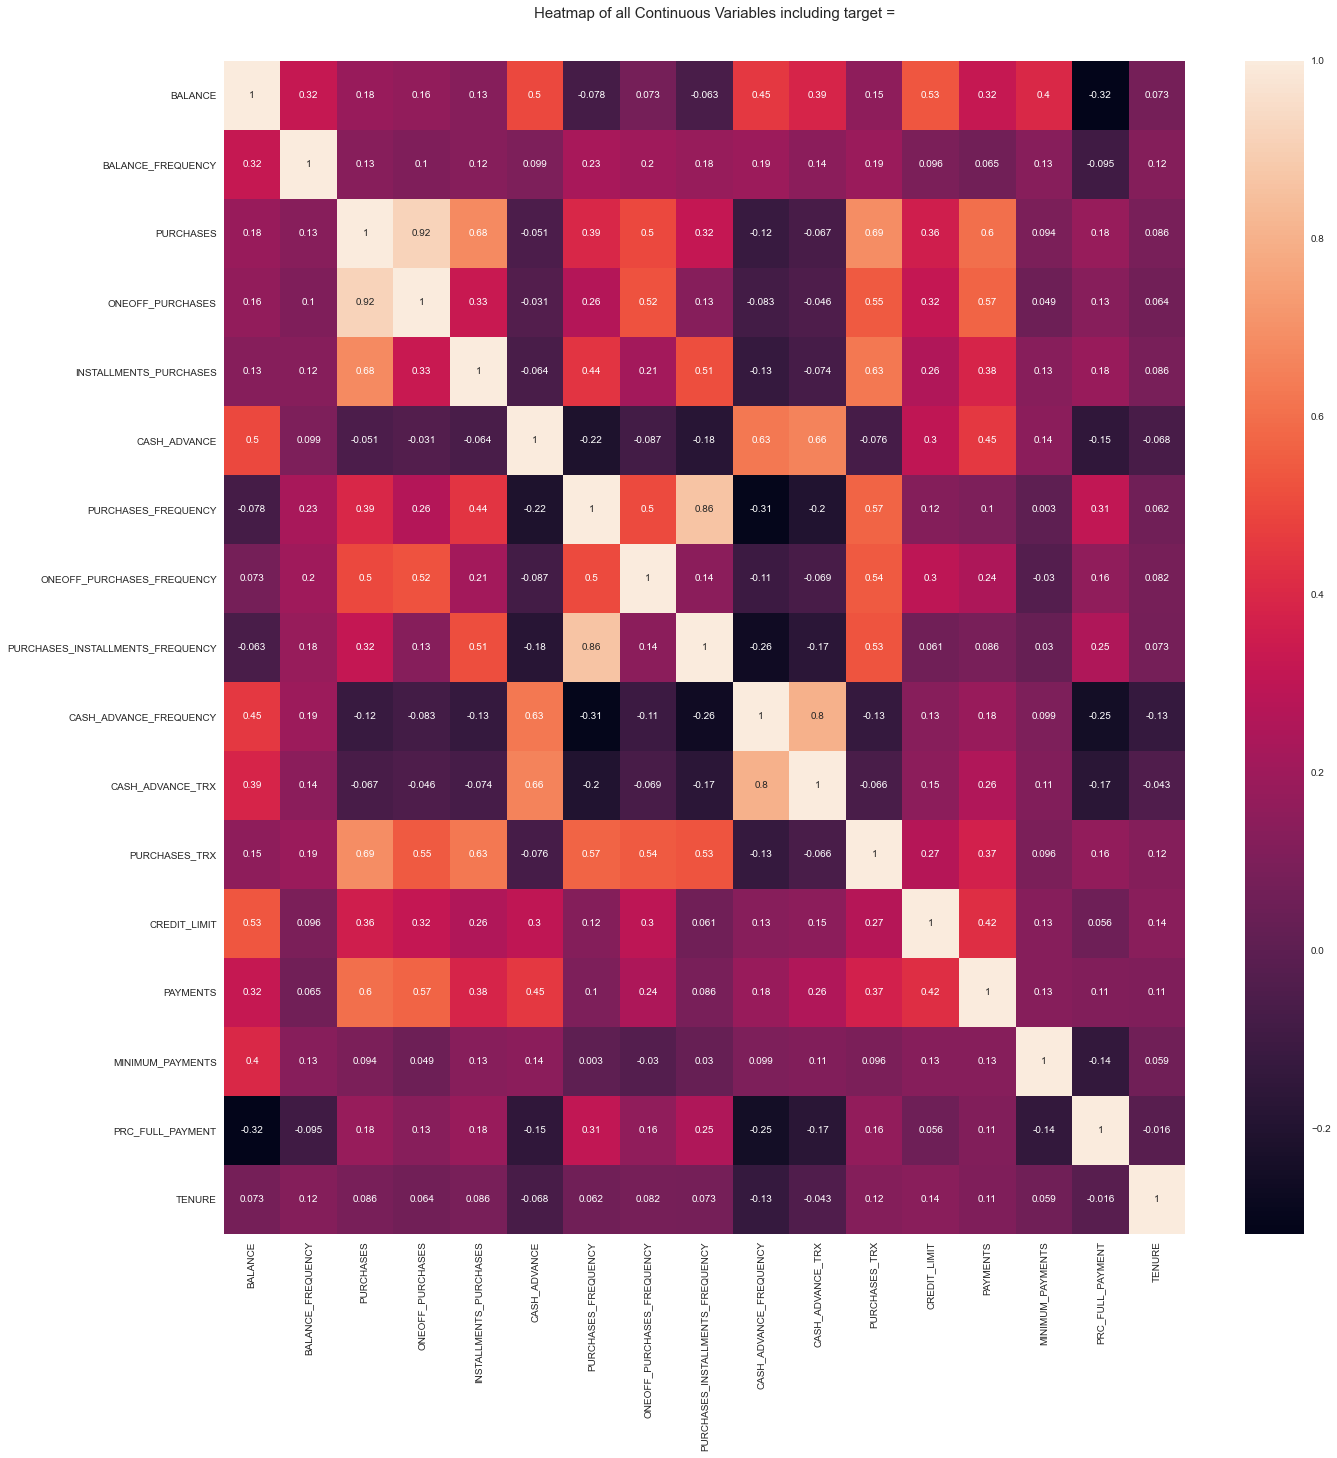

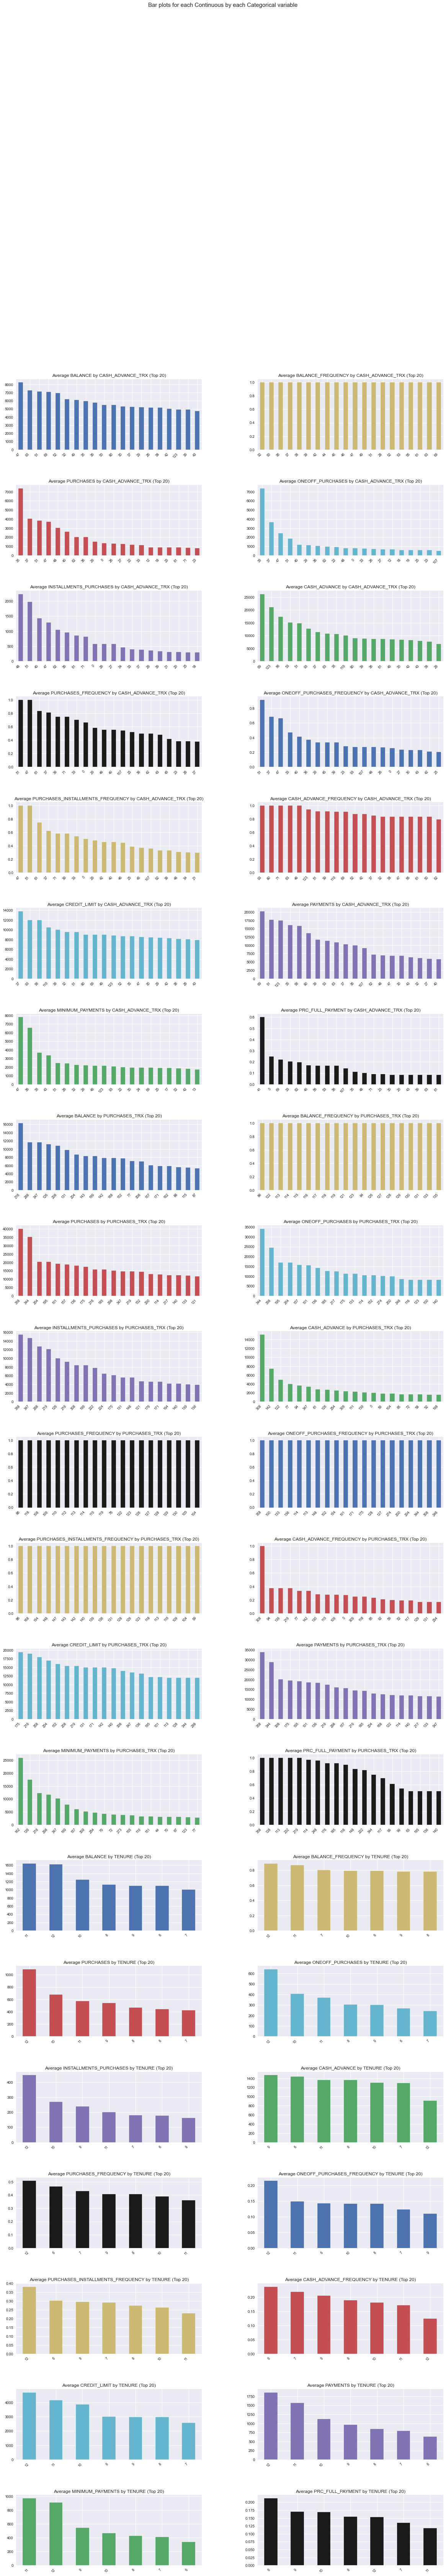

Time to run AutoViz (in seconds) = 72.965

 ###################### VISUALIZATION Completed ########################


In [109]:
# ! pip install autoviz
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()

dff = AV.AutoViz(url)

## Analysis

In [133]:
df.drop(['CUST_ID'], axis=1, inplace=True)
df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
4      817.714335           1.000000      16.00             16.00   
5     1809.828751           1.000000    1333.28              0.00   
...           ...                ...        ...               ...   
8943     5.871712           0.500000      20.90             20.90   
8945    28.493517           1.000000     291.12              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
4                       0.00      0.000000             0.083333   
5                    1333.28      0.000000             0.666667   
...                      ...           ...                  ...   
8943                    0.00      0.000000             0.166667   
8945                  291.12      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
4                       0.083333                          0.000000   
5                       0.000000                          0.583333   
...                          ...                               ...   
8943                    0.166667                          0.000000   
8945                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
4                   0.000000                 0              1        1200.0   
5                   0.000000                 0              8        1800.0   
...                      ...               ...            ...           ...   
8943                0.000000                 0              1         500.0   
8945                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
4      678.334763        244.791237          0.000000      12  
5     1400.057770       2407.246035          0.000000      12  
...           ...               ...               ...     ...  
8943    58.644883         43.473717          0.000000       6  
8945   325.594462         48.886365          0.500000       6  
8947    81

In [134]:
X = np.asarray(df)

In [135]:
from sklearn.preprocessing import StandardScaler

#standard scaler
scale = StandardScaler()

X = scale.fit_transform(X)
X.shape

(8636, 17)

In [113]:
from sklearn.cluster import KMeans

cost=[]
n_clusters = 30

for i in range(1, n_clusters):
    kmean= KMeans(i)
    kmean.fit(X)
    cost.append(kmean.inertia_)

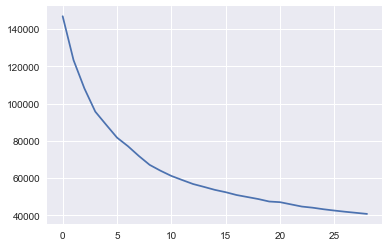

In [114]:
import matplotlib.pyplot as plt

plt.plot(cost, 'bx-')
plt.show()

We can choose k value to be 6

In [136]:
kmean= KMeans(6)
kmean.fit(X)

kmean.labels_

array([5, 3, 0, ..., 4, 5, 5])

In [139]:
clusters = pd.concat([df, pd.DataFrame({'cluster':kmean.labels_})], axis=1)
clusters.head(5)

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3          NaN                NaN        NaN               NaN   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     NaN           NaN                  NaN   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                         NaN                               NaN   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                    0.00               0.0            2.0        1000.0   
1                    0.25               4.0            0.0        7000.0   
2                    0.00               0.0           12.0        7500.0   
3                     NaN               NaN            NaN           NaN   
4                    0.00               0.0            1.0        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0   201.802084        139.509787          0.000000    12.0      5.0  
1  4103.032597       1072.340217          0.222222    12.0      3.0  
2   622.066742        627.284787          0.000000    12.0      0.0  
3          NaN               NaN               NaN     NaN      5.0  
4   678.334763        244.791237          0.000000    12.0      4.0

In [141]:
clusters["cluster"]

0       5.0
1       3.0
2       0.0
3       5.0
4       4.0
       ... 
8943    NaN
8945    NaN
8947    NaN
8948    NaN
8949    NaN
Name: cluster, Length: 8933, dtype: float64

In [142]:
plt.plot(clusters[clusters.cluster==0, 2], clusters[clusters.cluster==0, 3], "yo", label="Cluster 0")

# plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="Cluster 1")
# plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 2")
# plt.plot(X[y_pred==3, 2], X[y_pred==3, 3], "ro", label="Cluster 3")
# plt.plot(X[y_pred==4, 2], X[y_pred==4, 3], "rs", label="Cluster 4")
# plt.plot(X[y_pred==5, 2], X[y_pred==5, 3], "v", label="Cluster 5")

plt.xlabel("X", fontsize = 14)
plt.ylabel("Y", fontsize = 14)
plt.legend(loc = "upper left", fontsize = 14)

plt.show()

TypeError: '(0       False
1       False
2        True
3       False
4       False
        ...  
8943    False
8945    False
8947    False
8948    False
8949    False
Name: cluster, Length: 8933, dtype: bool, 2)' is an invalid key

## Gaussian Mixtures

In [143]:
from sklearn.mixture import GaussianMixture

y_pred  = GaussianMixture(n_components = 6, random_state=42).fit(X).predict(X)
mapping = np.array([0, 1, 2, 3, 4, 5])

y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])
y_pred

array([3, 5, 4, ..., 3, 5, 2])

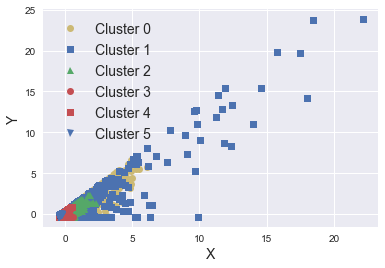

In [144]:
plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label="Cluster 0")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="Cluster 1")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 2")
plt.plot(X[y_pred==3, 2], X[y_pred==3, 3], "ro", label="Cluster 3")
plt.plot(X[y_pred==4, 2], X[y_pred==4, 3], "rs", label="Cluster 4")
plt.plot(X[y_pred==5, 2], X[y_pred==5, 3], "v", label="Cluster 5")

plt.xlabel("X", fontsize = 14)
plt.ylabel("Y", fontsize = 14)
plt.legend(loc = "upper left", fontsize = 14)

plt.show()

### Hopkins Test

In [ ]:
# ! pip install pyclustertend --user

In [ ]:
from pyclustertend import hopkins

In [ ]:
hopkins(X,150)

## MARKET BASKET ANALYSIS/Association Rule Mining

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.

In [223]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno
# ! pip install missingno

url = "https://raw.githubusercontent.com/toshihiroryuu/Dataset-test/main/E-Commerce_Market_Basket.csv"

df = pd.read_csv(url, encoding='ISO-8859-1')
# df = pd.read_csv(url, encoding='ISO-8859-1', nrows=60000)

df.head(5)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

In [201]:
# identify the size of data frame
print("Size of the data frame is",df.size)

# identify the shape of the data frame 
print("Shape of the data frame is",df.shape)
print("No of Rows = ", df.shape[0])
print("No of Columns = ", df.shape[1])

df.describe()

Size of the data frame is 4335272
Shape of the data frame is (541909, 8)
No of Rows =  541909
No of Columns =  8


Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

### Handling Missing Data points

AxesSubplot(0.125,0.125;0.775x0.755)


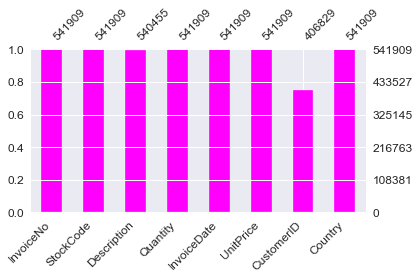

In [202]:
missing_bar  = msno.bar(df, figsize=(6, 3), fontsize=12, color='magenta')

print(missing_bar)

Customer ID's are not important so lets just ignore them.

### EDA

File encoding decoder utf-8 does not work for this file
Shape of your Data Set: (541909, 8)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  2
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  5
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    8 Predictors classified...
        This does not include the Target column(s)
        5 variables removed since they were ID or low-information variables
Since Number of Rows in data 541909 exceeds maximum, randomly sampling 150000 rows for EDA...
Number of All Scatter Plots = 3


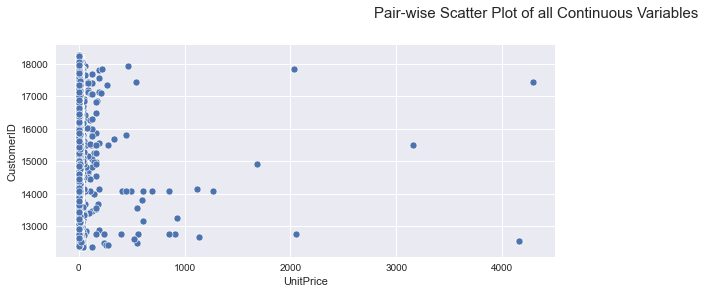

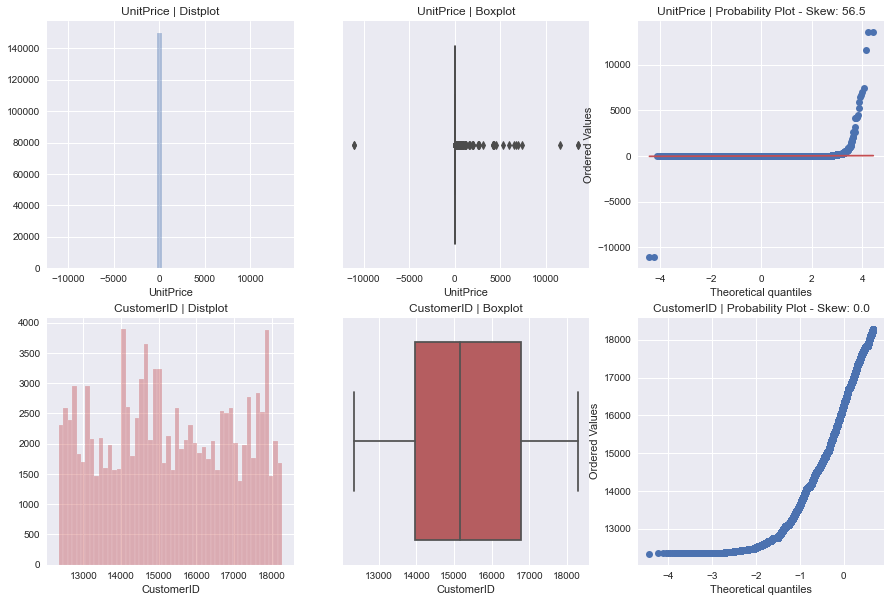

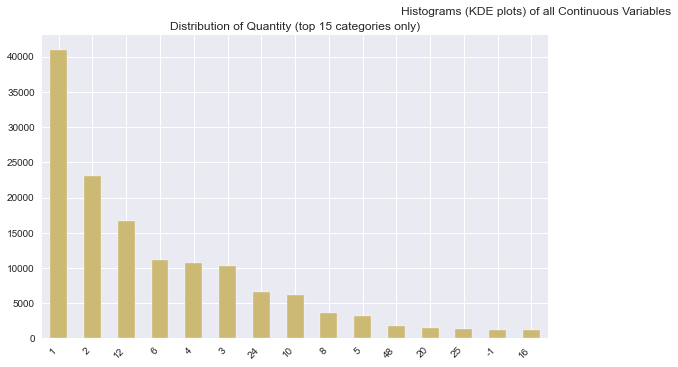

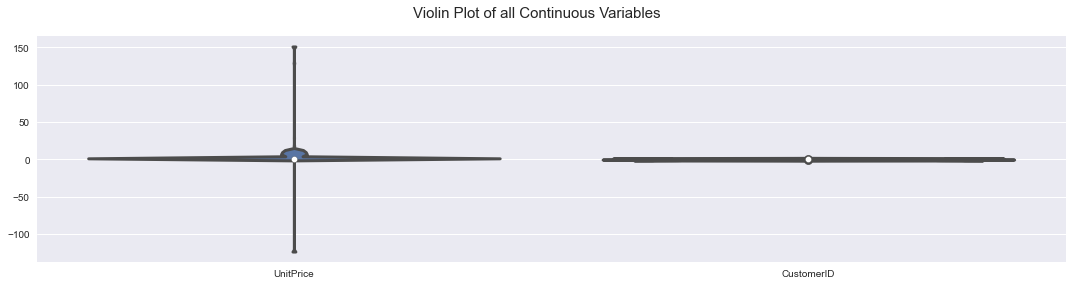

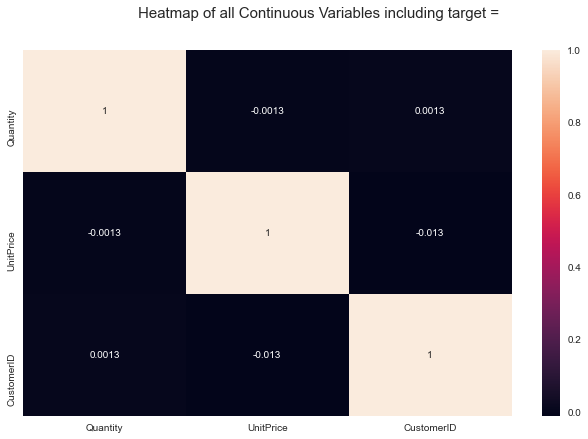

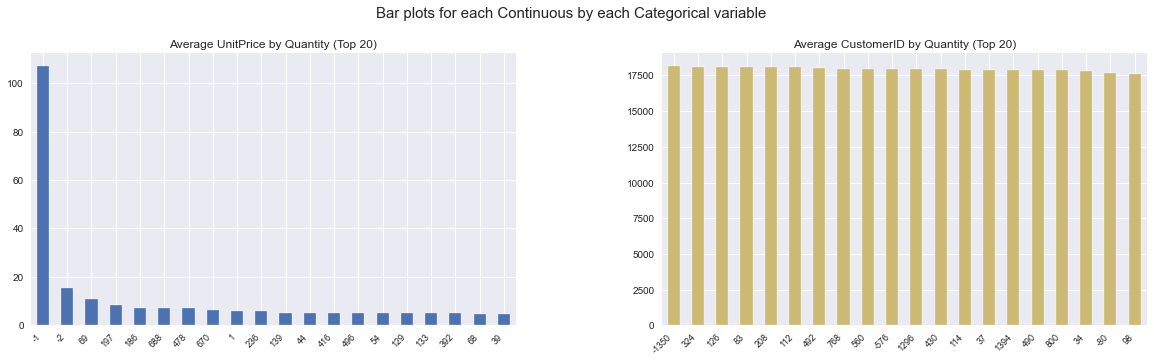

Time to run AutoViz (in seconds) = 42.786

 ###################### VISUALIZATION Completed ########################


In [148]:
# ! pip install autoviz
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()

dff = AV.AutoViz(url)

### Preprocessing

In [224]:
df.drop("StockCode", axis=1, inplace=True)
df.drop("InvoiceDate", axis=1, inplace=True)
df.drop("UnitPrice", axis=1, inplace=True)
df.drop("CustomerID", axis=1, inplace=True)
df.head(5)

InvoiceNo                          Description  Quantity         Country
0    536365   WHITE HANGING HEART T-LIGHT HOLDER         6  United Kingdom
1    536365                  WHITE METAL LANTERN         6  United Kingdom
2    536365       CREAM CUPID HEARTS COAT HANGER         8  United Kingdom
3    536365  KNITTED UNION FLAG HOT WATER BOTTLE         6  United Kingdom
4    536365       RED WOOLLY HOTTIE WHITE HEART.         6  United Kingdom

In [225]:
df.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [229]:
dff = df[df.Country == "Italy"]
dff.Country.unique()

array(['Italy'], dtype=object)

In [230]:
dff

InvoiceNo                          Description  Quantity Country
7214      537022         T-LIGHT GLASS FLUTED ANTIQUE        12   Italy
7215      537022        SCENTED VELVET LOUNGE CANDLE         12   Italy
7216      537022        BLUE FLOCK GLASS CANDLEHOLDER         6   Italy
7217      537022  SILVER GLITTER FLOWER VOTIVE HOLDER        12   Italy
7218      537022      6 CHOCOLATE LOVE HEART T-LIGHTS         6   Italy
...          ...                                  ...       ...     ...
529689    580746           BREAD BIN DINER STYLE RED          1   Italy
529690    580746                RECIPE BOX RETROSPOT          6   Italy
529691    580746                   DOORMAT UNION FLAG         2   Italy
529692    580746                  MINT KITCHEN SCALES         2   Italy
529693    580746    SET OF 3 CAKE TINS PANTRY DESIGN          9   Italy

[803 rows x 4 columns]

In [231]:
invoice_list = dff.InvoiceNo.unique()
print(len(invoice_list))
invoice_list

55


array(['537022', 'C537232', '539752', 'C540129', '541115', '541703',
       '542238', 'C542273', 'C543743', '544399', '545664', 'C546501',
       '546875', '547914', 'C547930', '547931', '549233', '550606',
       '555107', '555843', '556119', 'C558439', '561259', 'C562423',
       '562424', 'C562425', '562528', '562922', 'C562969', '564476',
       '567478', 'C569949', '570919', '571670', '572457', '572695',
       'C572761', '572934', '573365', '573508', '573768', '574022',
       'C576199', 'C576216', '576907', '577178', '577316', '577609',
       '577809', '578078', '578108', 'C578239', 'C579785', 'C579864',
       '580746'], dtype=object)

In [232]:
dictt = {}
transactions = []

In [235]:
for k, invoice in enumerate(invoice_list):
    temp_list = []
    for i in range(df.shape[0]):
        if df["InvoiceNo"][i] == invoice:
            temp_list.append(str(df["Description"][i]))
#     joined_string = ",".join(temp_list)
    dictt[invoice] = temp_list
    transactions.append(temp_list)
    print(k)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54


In [236]:
len(dictt.keys())

55

In [237]:
transactions[0:10]

[['T-LIGHT GLASS FLUTED ANTIQUE',
  'SCENTED VELVET LOUNGE CANDLE ',
  'BLUE FLOCK GLASS CANDLEHOLDER',
  'SILVER GLITTER FLOWER VOTIVE HOLDER',
  '6 CHOCOLATE LOVE HEART T-LIGHTS',
  'SET OF 6 T-LIGHTS SANTA',
  'SET OF 6 T-LIGHTS SNOWMEN',
  'PORCELAIN T-LIGHT HOLDERS ASSORTED',
  'GOLD MUG BONE CHINA TREE OF LIFE',
  'SCANDINAVIAN 3 HEARTS NAPKIN RING',
  'ROSE SCENT CANDLE IN JEWELLED BOX',
  'ROSE SCENT CANDLE JEWELLED DRAWER',
  'SET/3 VANILLA SCENTED CANDLE IN BOX',
  '3 GARDENIA MORRIS BOXED CANDLES',
  'ROSE 3 WICK MORRIS BOX CANDLE',
  'CHOCOLATE 1 WICK MORRIS BOX CANDLE',
  'CHOCOLATE 3 WICK MORRIS BOX CANDLE',
  'GARDENIA 3 WICK MORRIS BOXED CANDLE',
  '3 ROSE MORRIS BOXED CANDLES',
  'GRAND CHOCOLATECANDLE',
  'PINK BAROQUE FLOCK CANDLE HOLDER',
  'GREEN REGENCY TEACUP AND SAUCER',
  'CHARLIE+LOLA RED HOT WATER BOTTLE ',
  'POSTAGE'],
 ['SWEETHEART CARRY-ALL BASKET'],
 ['CAKE STAND WHITE TWO TIER LACE',
  'REGENCY CAKESTAND 3 TIER',
  'CAKE PLATE LOVEBIRD PINK',
  'CAKE ST

In [ ]:
# ! pip install mlxtend

In [238]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)
df.head(5)

12 EGG HOUSE PAINTED WOOD  12 PENCILS TALL TUBE RED RETROSPOT  \
0                      False                               False   
1                      False                               False   
2                      False                               False   
3                      False                               False   
4                      False                               False   

   12 PENCILS TALL TUBE SKULLS  12 PENCILS TALL TUBE WOODLAND  \
0                        False                          False   
1                        False                          False   
2                        False                          False   
3                        False                          False   
4                        False                          False   

   16 PIECE CUTLERY SET PANTRY DESIGN  20 DOLLY PEGS RETROSPOT  \
0                               False                    False   
1                               False                    False   
2                               False                    False   
3                               False                    False   
4                               False                    False   

   3 GARDENIA MORRIS BOXED CANDLES  3 ROSE MORRIS BOXED CANDLES  \
0                             True                         True   
1                            False                        False   
2                            False                        False   
3                            False                        False   
4                            False                        False   

   3 STRIPEY MICE FELTCRAFT  3 TIER CAKE TIN RED AND CREAM  ...  \
0                     False                          False  ...   
1                     False                          False  ...   
2                     False                          False  ...   
3                     False                          False  ...   
4                     False                          False  ...   

   WOODLAND BUNNIES LOLLY MAKERS  WOODLAND CHARLOTTE BAG  WRAP DOILEY DESIGN  \
0                          False                   False               False   
1                          False                   False               False   
2                          False                   False               False   
3                          False                   False               False   
4                          False                   False               False   

   WRAP ENGLISH ROSE   WRAP I LOVE LONDON   WRAP RED APPLES   \
0               False                False             False   
1               False                False             False   
2               False                False             False   
3               False                False             False   
4               False                False             False   

   WRAP RED VINTAGE DOILY  YOU'RE CONFUSING ME METAL SIGN   \
0                   False                            False   
1                   False                            False   
2                   False                            False   
3                   False                            False   
4                   False                            False   

   ZINC BOX SIGN HOME  ZINC FOLKART SLEIGH BELLS  
0               False                      False  
1               False                      False  
2               False                      False  
3               False                      False  
4               False                      False  

[5 rows x 480 columns]

In [239]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(dff, min_support=0.05, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

ValueError: The allowed values for a DataFrame are True, False, 0, 1. Found value 537022

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules 

frq_items = apriori(dff, min_support = 0.05, use_colnames = True) 
  
# Collecting the inferred rules in a dataframe 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

# Time series analysis 

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/toshihiroryuu/Dataset-test/main/infy_stock.csv"
 
df = pd.read_csv(url, parse_dates=['Date'])

df.head()

In [ ]:
# identify the size of data frame
print("Size of the data frame is",df.size)

# identify the shape of the data frame 
print("Shape of the data frame is",df.shape)
print("No of Rows = ", df.shape[0])
print("No of Columns = ", df.shape[1])

df.describe()

In [ ]:
df.info()

In [ ]:
import missingno as msno
# ! pip install missingno

miss_count = df.isnull().sum().sum()

print("No of missing values is",miss_count)

## EDA

In [ ]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(16,5), dpi=100)
plt.plot(df.Date, df["High"], color='tab:red')
plt.plot(df.Date, df["Low"], color='tab:blue')
plt.gca().set(title="Infy High, Low vs Date Price", xlabel='Date', ylabel='High - Low Price')
plt.show()

In [ ]:
plt.figure(figsize=(16,5), dpi=100)
plt.plot(df.Date, df["Open"], color='tab:green')
plt.plot(df.Date, df["Close"], color='tab:red')
plt.gca().set(title="Infy Open, Close Price vs Date", xlabel='Date', ylabel='Open - Close Price')
plt.show()

We can see a big dip in the Infy Price(High) from June to July.

In [ ]:
df['year'] = [d.year for d in df.Date]
df['month'] = [d.strftime('%b') for d in df.Date]
years = df['year'].unique()
df.head(2)

In [ ]:
import matplotlib as mpl
import numpy as np

# Select random colours
np.random.seed(34)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

In [ ]:
plt.figure(figsize=(8,6), dpi= 80)

for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'High', 
                 data=df.loc[df.year==y, :], 
                 color=mycolors[i], label=y)
        
        plt.text(df.loc[df.year==y, :].shape[0]-.9,
                 df.loc[df.year==y, 'High'][-1:].values[0],
                 y, fontsize=12, color=mycolors[i])
        
plt.gca().set(ylabel='High', xlabel='Month')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Price Time Series", fontsize=20)
plt.show()

In [ ]:
import seaborn as sns

df = pd.read_csv(url, parse_dates=['Date'])
df.reset_index(inplace=True)

df['year'] = [d.year for d in df.Date]
df['month'] = [d.strftime('%b') for d in df.Date]
years = df['year'].unique()

fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='High', data=df, ax=axes[0])
sns.boxplot(x='month', y='High', data=df.loc[~df.year.isin([1991, 2008]), :])

axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

We can observe seaasonality from the dataset. We cannot observe trend since we only have data of the year 2015.

## Check for Stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller

df = pd.read_csv(url, parse_dates=['Date'])

result = adfuller(df.High.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

Since p-value(0.75) is higher than significance level(0.05), therefore time series is non-stationary.

## Degree of differencing (d)

In [ ]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

In [ ]:
df = pd.read_csv(url, parse_dates=['Date'])

fig, axes = plt.subplots(4, 2, sharex=True)
axes[0, 0].plot(df.High); axes[0, 0].set_title('Original Series')
plot_acf(df.High, ax=axes[0, 1])

axes[1, 0].plot(df.High.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.High.diff().dropna(), ax=axes[1, 1])

axes[2, 0].plot(df.High.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.High.diff().diff().dropna(), ax=axes[2, 1])

axes[3, 0].plot(df.High.diff().diff().diff()); axes[3, 0].set_title('3rd Order Differencing')
plot_acf(df.High.diff().diff().diff().dropna(), ax=axes[3, 1])

plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
from numpy import log

result = adfuller(df.Passengers.diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

In [ ]:
from statsmodels.tsa.stattools import adfuller
from numpy import log

result = adfuller(df.Passengers.diff().diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

In [ ]:
The time series reaches stationarity with two orders of differencing. Since p-value of first order differnceing is 0.05, 
we can choose the order of differncing to be 1 for now.